## Titanic Survival Prediction Project

### Introduction

The goal of this project is to analyze data from Titanic passengers and build a ML model to predict which individuals survived the tragedy.

This is a classic binary classification problem, where the target variable is `Survived` (0 = No, 1 = Yes). The prediction will be based on various features such as age, gender, passenger class and more.

The project will follow a step-by-step approach:
- Understanding and exploring the dataset
- Cleaning the data
- Preprocessing the data
- Performing feature engineering
- Training three ML models
- Evaluating model performance using classification metrics
- Visual comparison of model results

The following three ML models will be used:
- **Logistic Regression**
- **Random Forest Classifier**
- **Support Vector Machine (SVM)**

### Imports and Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set style for plots to look nicer
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
%matplotlib inline

### Loading and Exploring the Data

In [2]:
# Load the dataset
raw_data = pd.read_csv("./titanic_data.csv")

# Examine the length of the dataset
print(f"The data has {raw_data.shape[0]} passengers (rows), each with {raw_data.shape[1]} features (columns).")

# Show the data types and how many non-null values each column has
print("\nData types and missing values info:")
raw_data.info()

# Display the first 10 rows to see what the data looks like
print("\nFirst 10 passengers in the dataset:")
display(raw_data.head(10))

The data has 891 passengers (rows), each with 12 features (columns).

Data types and missing values info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First 10 passengers in the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Cleaning the Data

Before we build any models, we need to check for missing data and remove the irrelevant columns. 

In [3]:
# Check for missing values in each column
print("Missing values in each column:\n")
print(raw_data.isna().sum())

Missing values in each column:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


By examining the dataset, we can conclude the following:

- The `Age` column has **177 missing values**, which is about 20% of the data. We'll fill these using the **median age**, as it's more robust to outliers than the mean.
- The `Cabin` column has **687 missing values**, over 75% of the total. Since it's mostly empty, we'll drop it.
- The `Embarked` column has only **2 missing values**, so we’ll fill them with the **most common port** (`"S"`).
- Columns like `Name`, `Ticket` and `PassengerId` are not useful for prediction and will be dropped.

We will also create a new copy of the dataset for cleaning.

In [4]:
# Make a copy of the data to clean
clean_data = raw_data.copy()

# Drop the columns we don't need
clean_data = clean_data.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)

# Calculate the median age from the Age column
median_age = raw_data["Age"].median() # Median is 28.0

# Fill the missing values in Age column with the median age value
clean_data["Age"] = clean_data["Age"].fillna(median_age)

# Fill the missing value in Embarked column with the most common value "S"
clean_data["Embarked"] = clean_data["Embarked"].fillna("S")

Now, we have a fully cleaned dataset with no missing values and only the relevant features retained for model training.

We will also save the cleaned data to a new CSV file.

In [5]:
# Verify no missing values remain
print("Missing values after cleaning:\n")
print(clean_data.isna().sum())

# Display the cleaned dataset
display(clean_data)

# Save cleaned data for future use
clean_data.to_csv("./clean_titanic_data.csv", index=False)

Missing values after cleaning:

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


### Data Preprocessing

Before training our models, we need to convert categorical data into numerical form.

- `Sex`: This has two unique values (`male`, `female`). We'll use **label encoding** (0 or 1).
- `Embarked`: This has three unique values (`S`, `C`, `Q`). We'll also use **label encoding** (0, 1 or 2).

We will also create a new copy of the cleaned data for preprocessing.


In [6]:
# Check unique values before encoding
print("Sex Column:", clean_data["Sex"].unique())
print("Embarked Column:", clean_data["Embarked"].unique())

# Copy cleaned data for preprocessing
preprocessed_data = clean_data.copy()

# Encode "Sex" (binary) and "Embarked" (multiclass) column
label_enc = LabelEncoder()
preprocessed_data["Sex"] = label_enc.fit_transform(preprocessed_data["Sex"])
preprocessed_data["Embarked"] = label_enc.fit_transform(preprocessed_data["Embarked"])

# Display the preprocessed dataset
display(preprocessed_data)

# Save to CSV file
preprocessed_data.to_csv("./preprocessed_titanic_data.csv", index=False)

Sex Column: ['male' 'female']
Embarked Column: ['S' 'C' 'Q']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


### Feature Scaling

With feature scaling, we standardize the range of independent variables (features), so that they contribute equally to model training.

We’ll use `StandardScaler` to transform the features so that they have a mean of 0 and a standard deviation of 1.


In [7]:
# Separate features (independent variables) from the target (what we want to predict)
features = preprocessed_data.drop("Survived", axis=1)
target = preprocessed_data["Survived"]

# Fit the scaler to the features and transform them
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Train-Test Split

Here we split the data into training (80%) and testing (20%) sets.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

### Model Training and Evaluation

We'll now train three different ML models:
- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**

We will evaluate each model using the following:
- **Accuracy**: The percentage of correct predictions.
- **Classification Report**: A detailed breakdown of precision, recall and F1 score for each class.
- **Confusion Matrix**: A heatmap showing true vs predicted values, for visualizing performance.


Training and evaluating Logistic Regression

Logistic Regression Results:
Accuracy: 0.8044692737430168 | 80.447%

Detailed performance report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



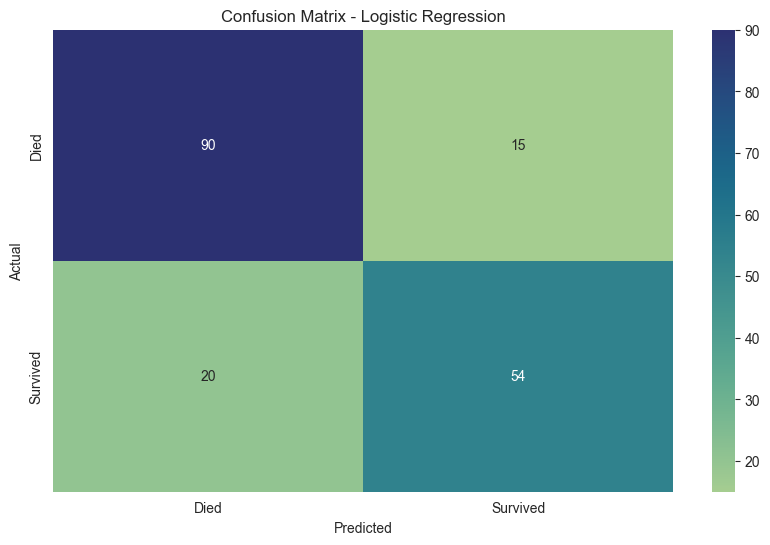


Training and evaluating Random Forest

Random Forest Results:
Accuracy: 0.8100558659217877 | 81.006%

Detailed performance report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



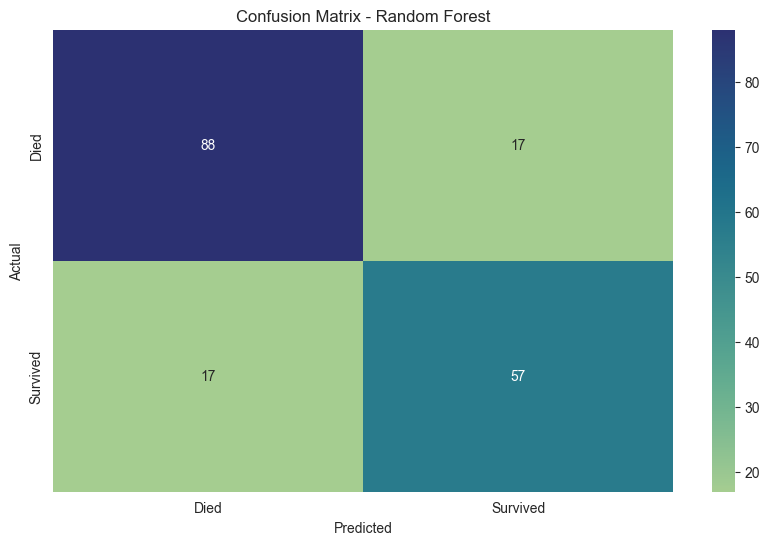


Training and evaluating Support Vector Machine

Support Vector Machine Results:
Accuracy: 0.8156424581005587 | 81.564%

Detailed performance report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



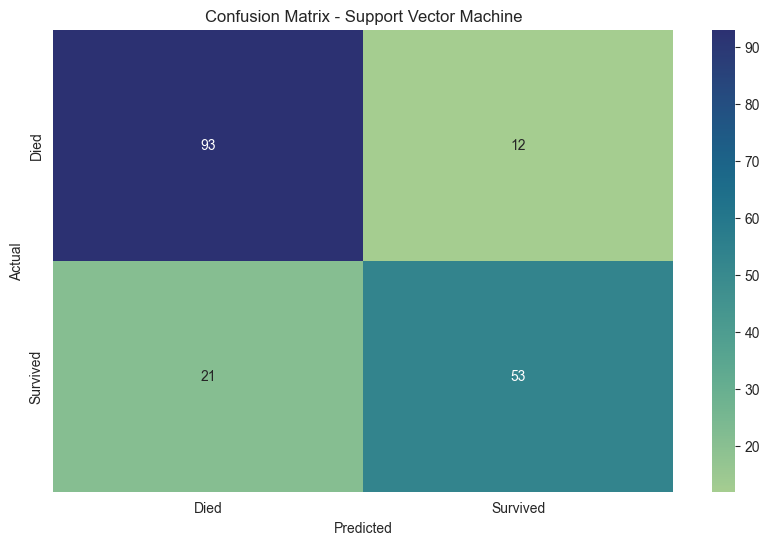

In [9]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Support Vector Machine": SVC()
}

# Dictionary to store accuracy results
results = {}

# Train each model and evaluate its performace
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training and evaluating {name}")
    print(f"{'='*50}")
    
    # Train the model on our training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    preds = model.predict(X_test)
    
    # Calcuate accuracy
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    
    # Print performance metrics
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc} | {round(acc * 100, 3)}%")
    print("\nDetailed performance report:")
    print(classification_report(y_test, preds))
    
    # Show confusion matrix (true vs predicted)
    plt.figure()
    sns.heatmap(confusion_matrix(y_test, preds), 
                annot=True, 
                fmt="d",
                cmap="crest",
                xticklabels=["Died", "Survived"],
                yticklabels=["Died", "Survived"])
    plt.title(f"Confusion Matrix - {name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

### Comparing Model Results

In this section, we will compare the performance of the models based on their accuracy scores and use bar chart to visualize the results.

Model Comparison:
Logistic Regression: 80.45% accuracy
Random Forest: 81.01% accuracy
Support Vector Machine: 81.56% accuracy


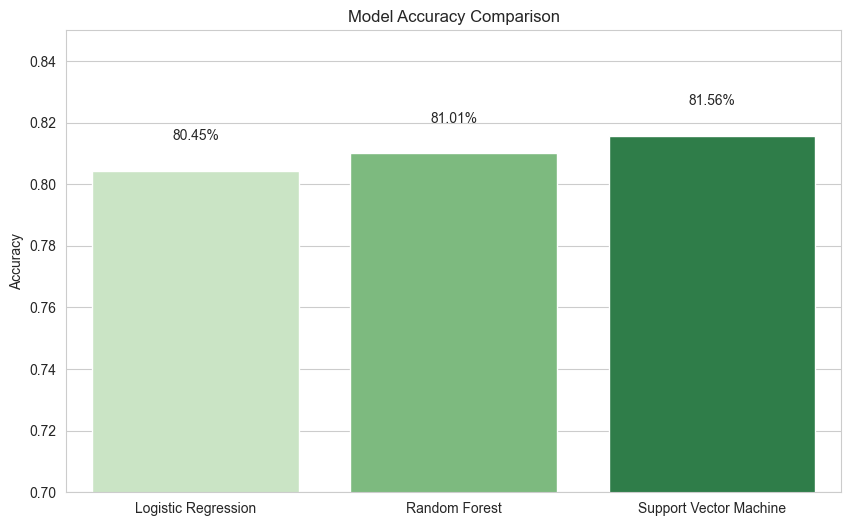

In [10]:
# Compare the accuracy of all models
print("Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.2%} accuracy")

# Visual comparison
plt.figure()
sns.barplot(x=list(results.keys()), y=list(results.values()), hue=list(results.keys()), palette="Greens")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.85)  # Set y-axis limits to better see differences
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha="center") # Annotate accuracy values on the bars
plt.show()

### Conclusion

In this project, we successfully built and evaluated multiple ML models to predict Titanic survival. We performed data cleaning, preprocessing and feature scaling to prepare the data for training. After training three models, we compared their accuracy and selected the best-performing model - **Support Vector Machine (SVM)**. 

This model can be further fine-tuned and deployed to predict survival on new Titanic passenger data.
